In [3]:
# Cargar bibliotecas necesarias
library(lubridate)
library(ggplot2)
library(scales) # For percent_format()
library(RColorBrewer)

In [4]:
# Leer archivo de datos diarios de una ciudad específica (Por ejemplo Hermosillo)
df0 <- read.csv(file="HMO_II_DGE_1973_2016.txt", header=F, sep=",", stringsAsFactors=FALSE)
df0$V6 <- NULL
names(df0) <- c("date", "Precip", "Evap", "Tmax", "Tmin")

# Convertir a variables numéricas
df0$Precip <- as.numeric(df0$Precip);
df0$Evap <- as.numeric(df0$Evap);
df0$Tmax <- as.numeric(df0$Tmax);
df0$Tmin <- as.numeric(df0$Tmin);

# Cambiar formato de fecha a Año-Mes-Día 
df0$date <- format(as.Date(df0$date, format = "%d/%m/%Y"), "%Y-%m-%d")

# Seleccionar datos de Abril a Noviembre 
df1_tmp1 <- df0[(format.Date(df0$date, "%m") >= "04" & !is.na(df0$date)),]
df1 <- df1_tmp1[(format.Date(df1_tmp1$date, "%m") <= "11" & !is.na(df1_tmp1$date)),]
# Seleccionar los datos entre los años 1981 y 2010
df1_tmp2 <- df1[(format.Date(df1$date, "%Y") >= "1981" & !is.na(df1$date)),]
df2 <- df1_tmp2[(format.Date(df1_tmp2$date, "%Y") <= "2010" & !is.na(df1_tmp2$date)),]

# Agregar clasificación por mes
df2$Month <- factor(month(df2$date),
                         labels = c("Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov"))


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

In [5]:
# Explorar datos: min, cuartiles, promedio, máximo
MaxT <- df2$Tmax
summary(MaxT)
# Tomar el valor promedio (Mean) para insertarlo en la posición de la línea vertical 
# en el histograma de abajo

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   17.0    33.0    36.5    35.8    39.5    47.5       2 

Mean 
35.8 

Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”

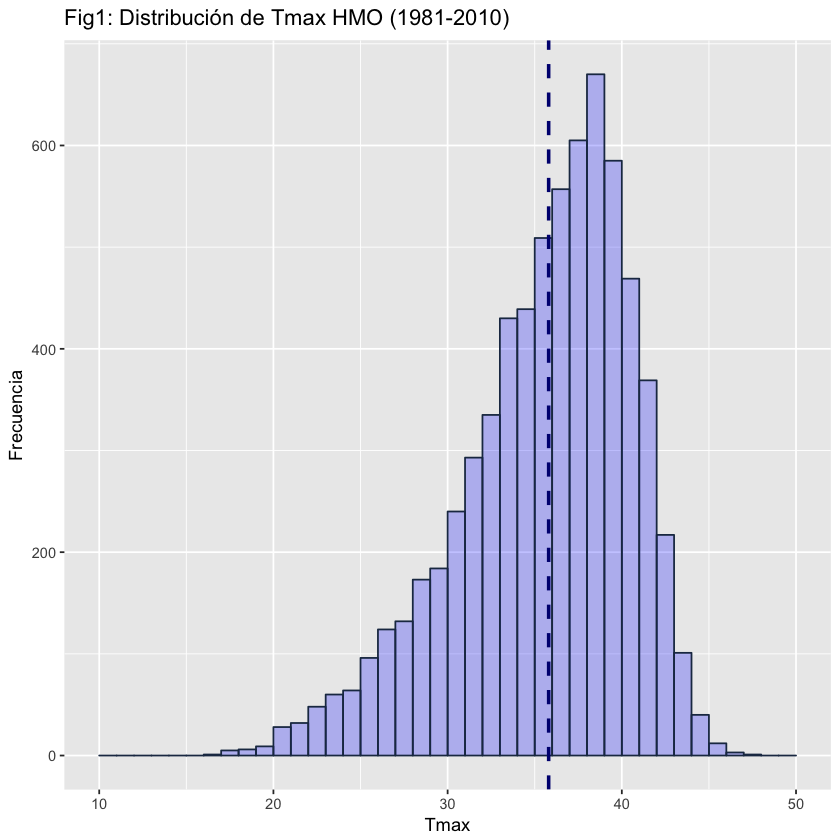

In [26]:
# Histograma de la Climatología de referencia base (1981-2010)
# La línea vertical punteada es el valor promedio de Tmax ... será 35.8ºC para HMO
df2_mean <- as.array(summary(df2$Tmax)[4])
df2_mean
ggplot(data=df2, aes(df2$Tmax)) + 
# Rango de temperaturas entre 10ºC y 50ºC
  geom_histogram(breaks=seq(10, 50), 
                 col="#1F3552", 
                 fill="blue", 
                 alpha = .25) + 
  labs(title="Fig1: Distribución de Tmax HMO (1981-2010)") +
  labs(x="Tmax", y="Frecuencia") +
# Insertar aqui el valor promedio de Tmax: 35.8 para Hermosillo
  geom_vline(xintercept = 35.8, linetype="dashed", 
                color = "navy", size=1.0)
  

Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”

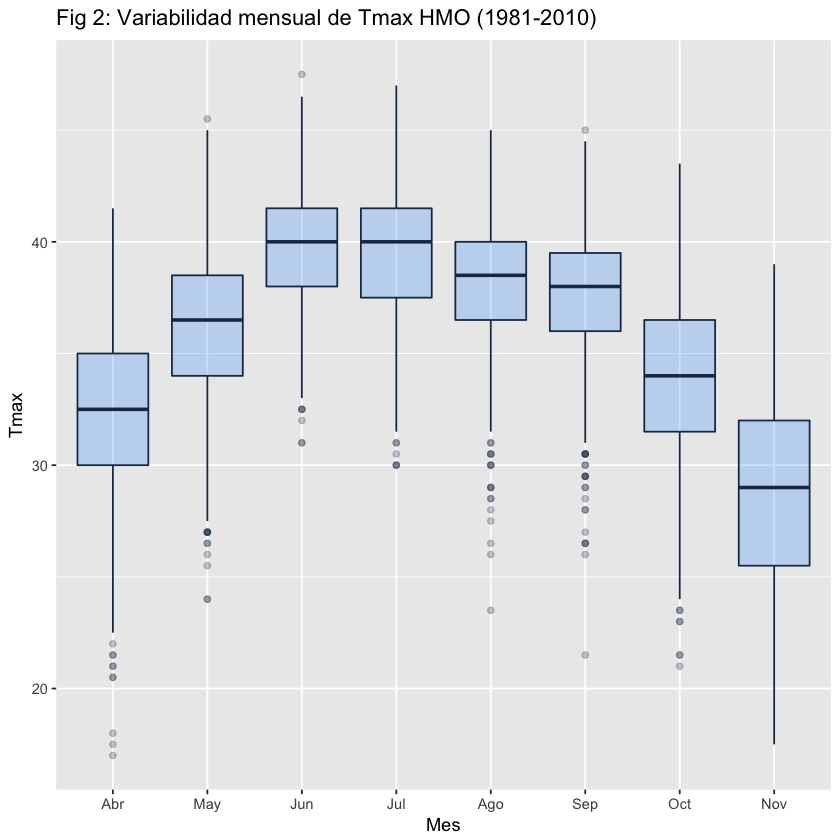

In [27]:
# Gráfica de cajas (boxplot) para mostrar la variabilidad climática
# Proporciona los valores extremos Min, 1er cuartil, Mediana, 3er cuartil y Máx 
# Cada cuartil tiene 25% de los datos.
# Existen un par de datos que se salen de lo normal (anomalías válidas)
fill <- "#3399FF"
line <- "#1F3552"
ggplot(df2, aes(x = Month, y = Tmax)) +
        geom_boxplot(fill = fill, colour = line, alpha=0.25) +
        scale_x_discrete(name = "Mes") +
        ggtitle("Fig 2: Variabilidad mensual de Tmax HMO (1981-2010)")

In [8]:
# Use los mismos datos del SMN, el complemento...
# Trabajar con el resto de los datos posteriores a 2010
# Seleccionar los datos de los años mayores a 2010
dfNew2 <- df1[(format.Date(df1$date, "%Y") >= "2011" & !is.na(df1$date)),]

# Agregar clasificación por mes
dfNew2$Month <- factor(month(dfNew2$date),
                         labels = c("Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov"))
summary(dfNew2$Tmax)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  21.00   33.00   37.00   36.21   40.00   48.50 

 Mean 
36.21 

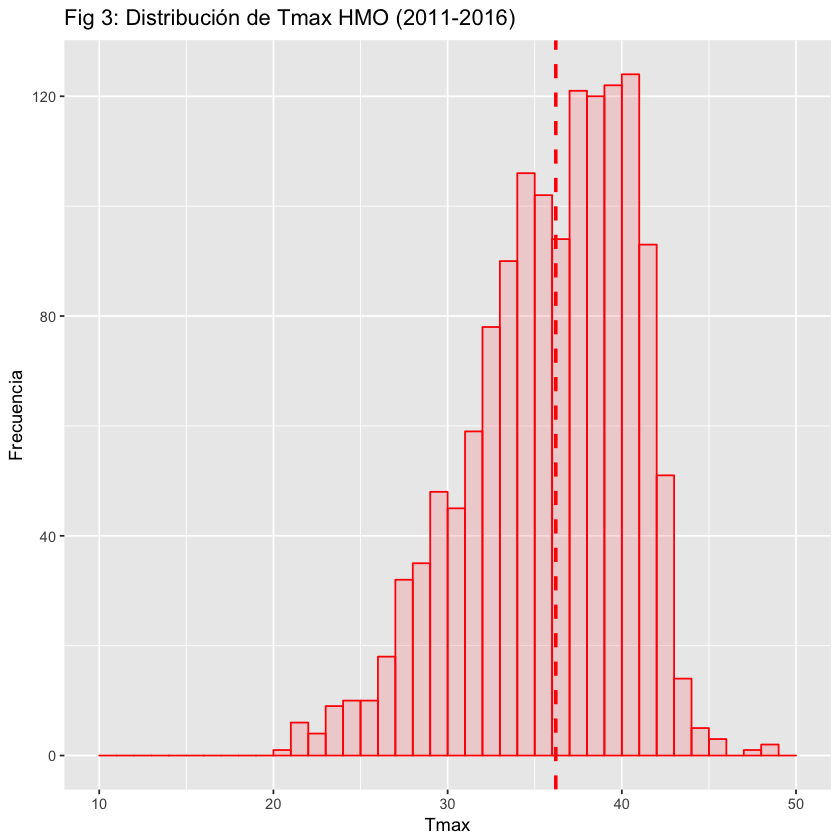

In [28]:
# Producir el histograma de distribución de Tmax
dfNew2_mean <- as.array(summary(dfNew2$Tmax)[4])
dfNew2_mean
ggplot(data=dfNew2, aes(dfNew2$Tmax)) + 
# Rango de temperaturas entre 10ºC y 50ºC
  geom_histogram(breaks=seq(10, 50), 
                 col="red", 
                 fill="#FF6666", 
                 alpha = .2) + 
  labs(title="Fig 3: Distribución de Tmax HMO (2011-2016)") +
  labs(x="Tmax", y="Frecuencia") +
# Insertar aqui el valor promedio de Tmax: 36.21 para Hermosillo
  geom_vline(xintercept = 36.21, linetype="dashed", 
                color = "red", size=1.0)
  

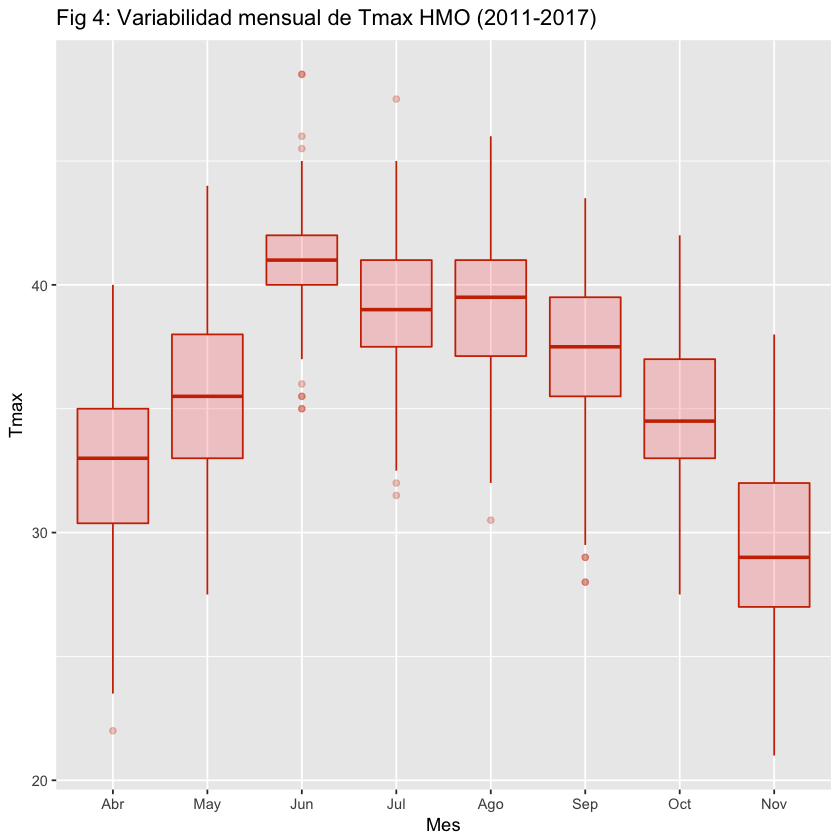

In [29]:
# Producir el diagrama de cajas, para mostrar la variabilidad climática 2011-2017
fill <- "#FF6666"
line <- "#CC3300"
ggplot(dfNew2, aes(x = Month, y = Tmax)) +
        geom_boxplot(fill = fill, colour = line, alpha=0.25) +
        scale_x_discrete(name = "Mes") +
        ggtitle("Fig 4: Variabilidad mensual de Tmax HMO (2011-2017)")


In [11]:
# Resumen de datos (verificar que no hay valores anómalos)
summary(df2$Tmax)
summary(dfNew2$Tmax)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   17.0    33.0    36.5    35.8    39.5    47.5       2 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  21.00   33.00   37.00   36.21   40.00   48.50 

Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”

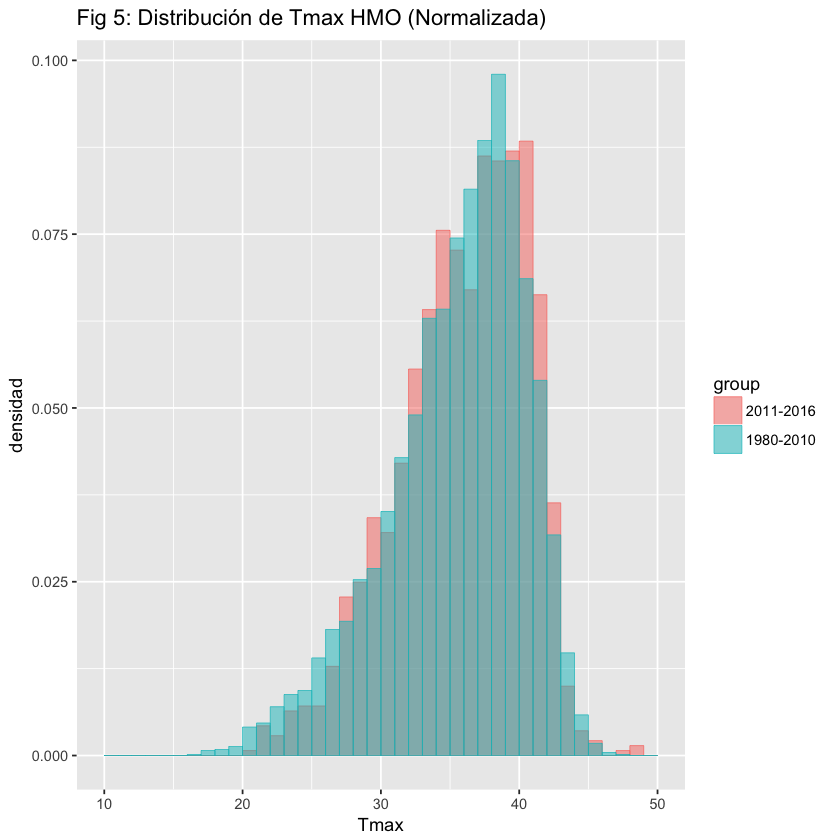

In [37]:
# Combinar los 2 histogramas para hacer la comparación entre las 2 épocas
# Como el número de datos de 1981-2010, es mayor al número de datos de 2011-2017, 
# normalizamos (es decir la suma de áreas es iguañ a 1)
require(ggplot2)
dat1 = data.frame(x=dfNew2$Tmax, group="2011-2016")
dat2 = data.frame(x=df2$Tmax, group="1980-2010")
dat = rbind(dat1, dat2)

ggplot(dat, aes(x, fill=group, colour=group)) +
  geom_histogram(aes(y=..density..), breaks=seq(10,50), alpha=0.5, 
                 position="identity", lwd=0.2) +
  ggtitle("Fig 5: Distribución de Tmax HMO (Normalizada)") +
  scale_y_continuous(name="densidad") +
  scale_x_continuous(name="Tmax", limits=c(10, 50))

Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”

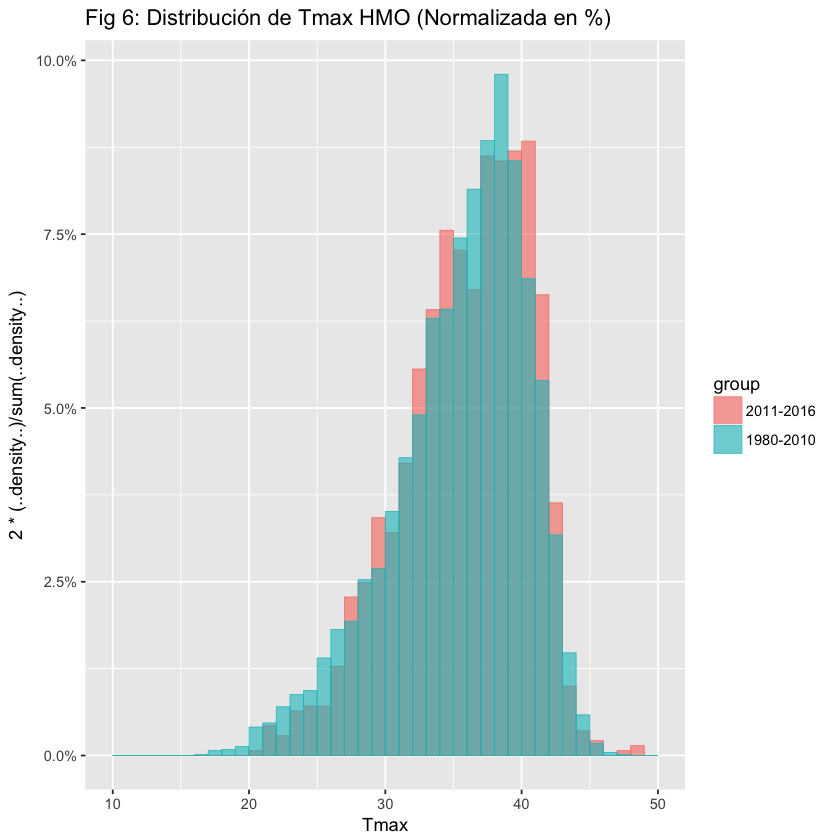

In [38]:
# La misma gráfica anterior pero en porcentaje de área
ggplot(dat, aes(x, fill=group, colour=group)) +
  geom_histogram(aes(y=2*(..density..)/sum(..density..)), breaks=seq(10,50,1), alpha=0.6, 
                 position="identity", lwd=0.2) +
  scale_y_continuous(labels=percent_format()) +
  ggtitle("Fig 6: Distribución de Tmax HMO (Normalizada en %)") +
  scale_x_continuous(name="Tmax", limits=c(10, 50))


Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”

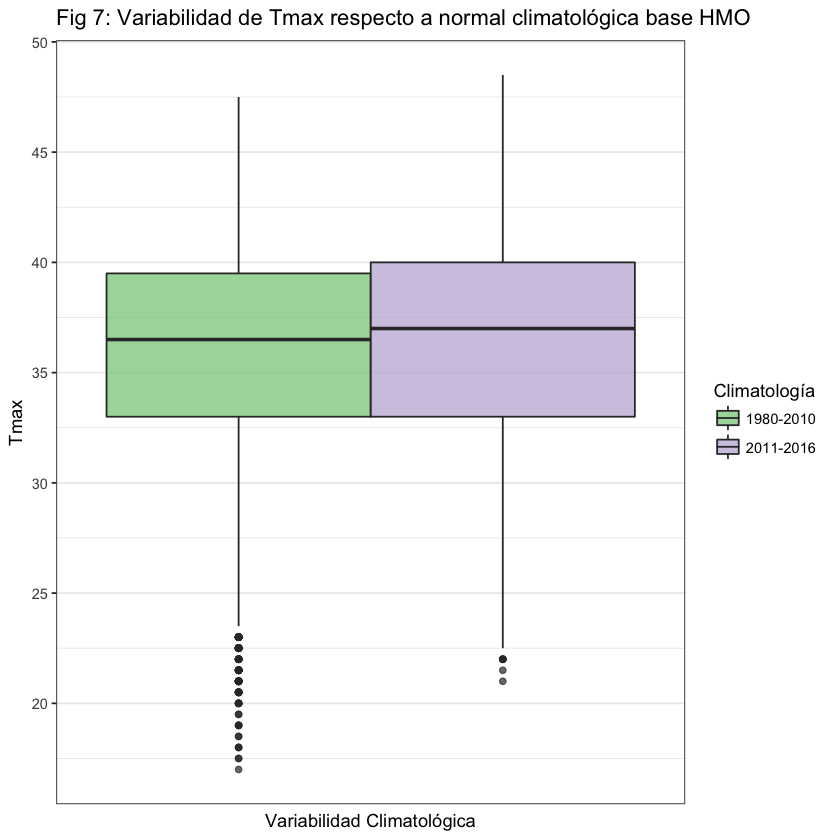

In [25]:
# Unir colecciones de datos 1980-2010 y 2011-2017 para hacer gráfica de cajas
# Nos mostrará la comparación de variabilidad de ambos periodos
datBox1 = data.frame(cbind(df2$Tmax, df2$Month), group="1980-2010")
datBox2 = data.frame(cbind(dfNew2$Tmax, dfNew2$Month), group="2011-2016")
datBox = rbind(datBox1, datBox2)
names(datBox) <- c("Tmax", "Mes", "Grupo")

# gráfica Boxplot comparando el perido reciente respecto a la climatología 1981-2010
p10 <- ggplot(datBox, aes(x = Mes, y = Tmax, fill = Grupo)) +
        geom_boxplot(alpha=0.7) +
        scale_y_continuous(name = "Tmax",
                           breaks = seq(10,50,5)) +
        scale_x_discrete(name = "Variabilidad Climatológica") +
        ggtitle("Fig 7: Variabilidad de Tmax respecto a normal climatológica base HMO") +
        theme_bw() +
        #theme(plot.title = element_text(size = 14, family = "Tahoma", face = "bold"),
        #      text = element_text(size = 12, family = "Tahoma"),
        #      axis.title = element_text(face="bold"),
        #      axis.text.x=element_text(size = 11)) +
        scale_fill_brewer(palette = "Accent") +
        labs(fill = "Climatología")
p10

In [ ]:
# Segunda parte (Pendiente)

In [ ]:
dfNew0 <- read.csv(file="TEMP_Hillo_2011-2017.csv", header=F, sep=",", stringsAsFactors=FALSE, skip=2)
df2011 <- cbind(dfNew0$V1, dfNew0$V2, dfNew0$V3)
df2012 <- cbind(dfNew0$V4, dfNew0$V5, dfNew0$V6)
df2013 <- cbind(dfNew0$V7, dfNew0$V8, dfNew0$V9)
df2014 <- cbind(dfNew0$V10, dfNew0$V11, dfNew0$V12)
df2015 <- cbind(dfNew0$V13, dfNew0$V14, dfNew0$V15)
df2016 <- cbind(dfNew0$V16, dfNew0$V17, dfNew0$V18)
df2017 <- cbind(dfNew0$V19, dfNew0$V20, dfNew0$V21) 
df2011_2017 <- data.frame(rbind(df2011, df2012, df2013, df2014, df2015, df2016))
names(df2011_2017) <- c("date", "Tmax", "Tmin")
df2011_2017$Tmax <- as.numeric(df2011_2017$Tmax)
df2011_2017$Tmin <- as.numeric(df2011_2017$Tmin)
df2011_2017$date <- format(as.Date(df2011_2017$date, format = "%d/%m/%Y"), "%Y-%m-%d")

In [ ]:
require(lubridate)
# Seleccionar datos de Abril a Noviembre 
df1_temp1 <- df2011_2017[(format.Date(df2011_2017$date, "%m") >= "04" & !is.na(df2011_2017$date)),]
df1N <- df1_temp1[(format.Date(df1_temp1$date, "%m") <= "11" & !is.na(df1_temp1$date)),]
# Seleccionar los datos entre los años 1981 y 2010
#df1_tmp2 <- df1[(format.Date(df1$date, "%Y") >= "1981" & !is.na(df1$date)),]
#df2 <- df1_tmp2[(format.Date(df1_tmp2$date, "%Y") <= "2010" & !is.na(df1_tmp2$date)),]

# Agregar clasificación por mes
df1N$Month <- factor(month(df1N$date),
                         labels = c("Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov"))

In [ ]:
# Explorar datos: min, cuartiles, promedio, máximo
MaxT2 <- df1N$Tmax
summary(MaxT2)
# Tomar el valor promedio para insertarlo en la posición de la línea vertical 
# en el histograma de abajo


In [ ]:
head(df2011)


In [ ]:
tail(df2011)